# Only for testing, **DO NOT USE** in production

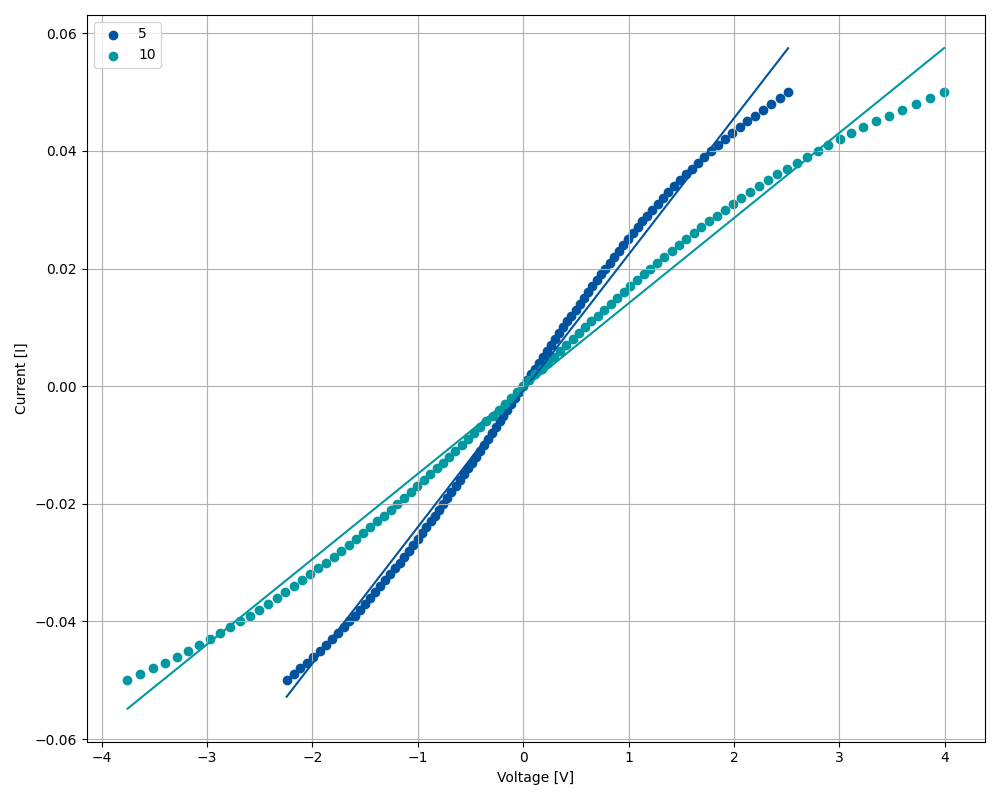

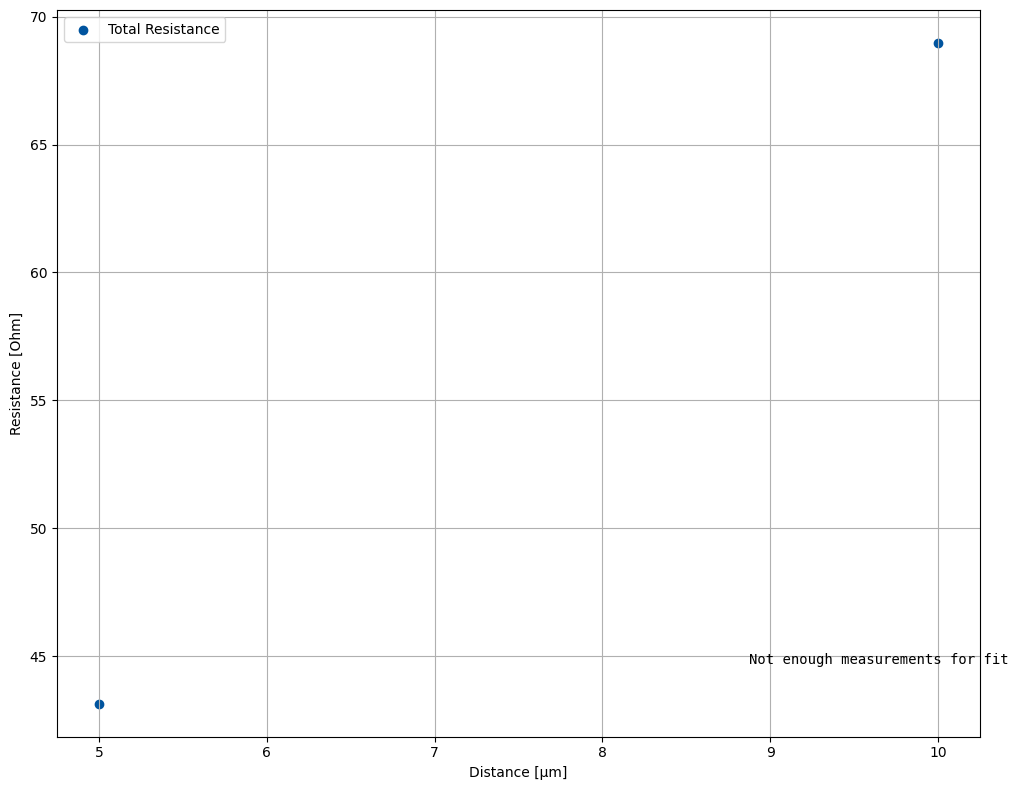

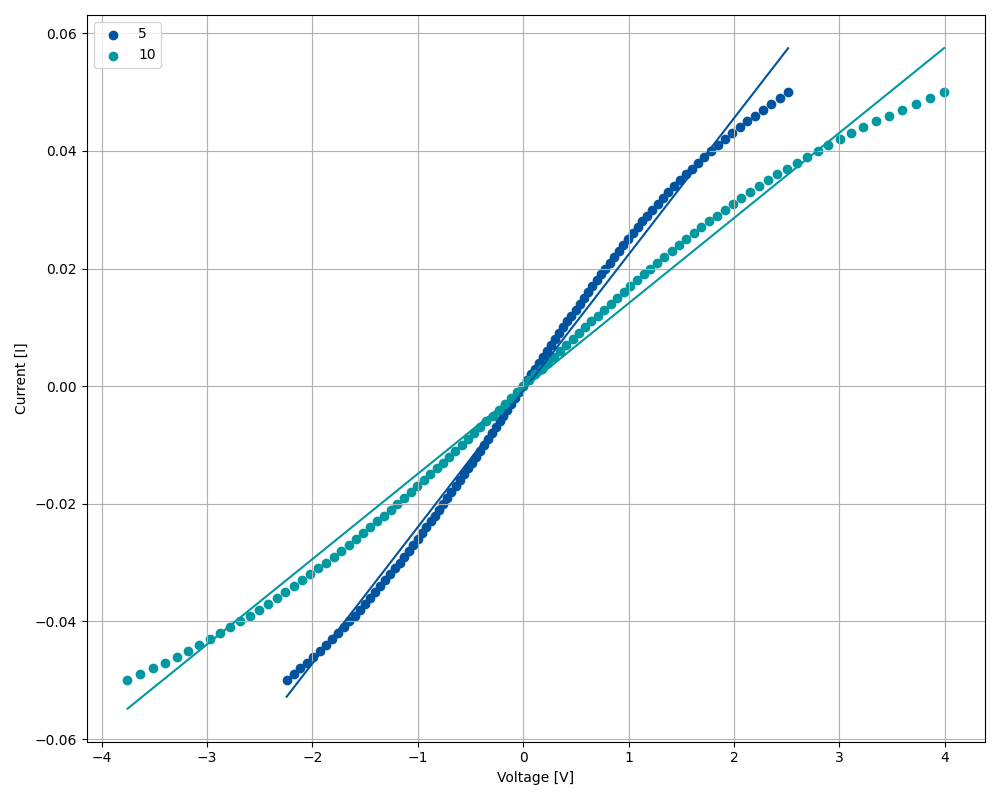

In [1]:
%matplotlib widget
import ctlmevaluationlib as testlib

fl5=('//fileserver.cst.rwth-aachen.de/public/Samples/Aixtron_200_mm/PW00070R_3/PW00070R_3_G5 (22053)/Electrical/MESA - TLM/K11_1.txt',
     '//fileserver.cst.rwth-aachen.de/public/Samples/Aixtron_200_mm/PW00070R_3/PW00070R_3_G5 (22053)/Electrical/MESA - TLM/K11_2.txt',
     '//fileserver.cst.rwth-aachen.de/public/Samples/Aixtron_200_mm/PW00070R_3/PW00070R_3_G5 (22053)/Electrical/MESA - TLM/K11_3.txt',
     '//fileserver.cst.rwth-aachen.de/public/Samples/Aixtron_200_mm/PW00070R_3/PW00070R_3_G5 (22053)/Electrical/MESA - TLM/K11_4.txt',
     '//fileserver.cst.rwth-aachen.de/public/Samples/Aixtron_200_mm/PW00070R_3/PW00070R_3_G5 (22053)/Electrical/MESA - TLM/K11_5.txt',)

test = 2 # how many input files are used, always starting from _1 to _5

testdict = { 1 : fl5[0:1],
             2 : fl5[0:2],
             3 : fl5[0:3],
             4 : fl5[0:4],
             5 : fl5[0:5]}

tlm = testlib.CTLMandTLMMeasurement("tlm", testdict[test], distances = (5, 10, 15, 25, 50), contactlenght = 50, inner_radius = 55, output=False)

#display(tlm.df); #display(tlm.R); #display(tlm.lin_reg_dfs); #print(tlm.R_statistics); #display(tlm.RT0)
tlm.uigraph(); tlm.rtgraph()

if test > 2:
    tlm.eval0.graph()
    pass

if test == 5:
    print(tlm.results)
    tlm.eval1.graph()
    tlm.eval2.graph()
    pass


In [4]:
if test == 5:
    tlm.refine_evaluated_range((-0.035,0.035))
    tlm.uigraph()
    tlm.rtgraph()
    tlm.eval0.graph()
    print(tlm.results)
    tlm.eval1.graph()
    tlm.eval2.graph()

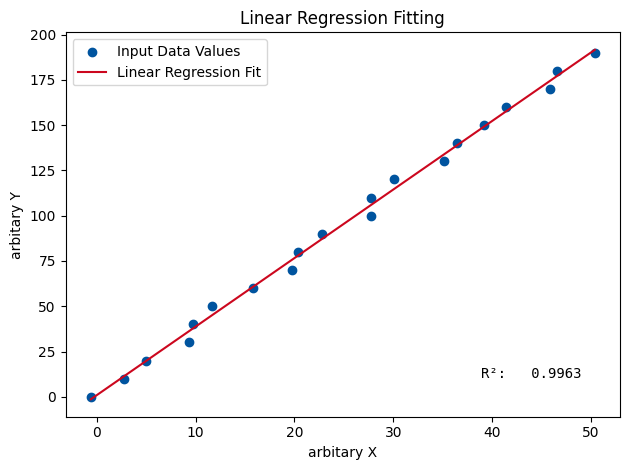

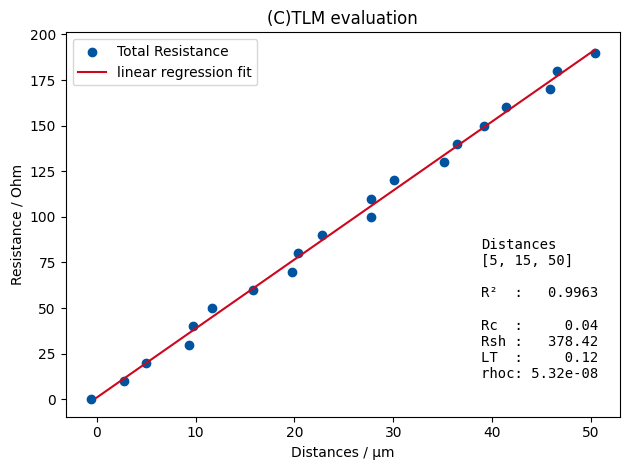

In [5]:
import numpy as np
import pandas as pd
import ctlmevaluationlib as testlib
start = 0.0
stop = 200.0
step = 10.0
test_data_x1 = np.arange(start, stop, step)
test_data_y2 = np.linspace(0,50.0,num=len(test_data_x1))
x1=test_data_x1
y1=test_data_y2
y1 = y1 + np.random.uniform(-1.5,1.5,size=len(y1))
df = pd.DataFrame([y1,x1]).transpose()
df.columns = ['U', 'I'] # Rename the columns
fit=testlib.LinearRegressionFitting(df, xlabel="arbitary X", ylabel="arbitary Y")
fit.graph()
fit2=testlib.TLM_Evaluation(df,100, comment = "Distances\n[5, 15, 50]")
fit2.graph()